# SVM(Support vector machines)
Es una tecnica de aprendizaje supervisado para la clasificacion binario, en donde los elementos a analizar se ubican en un espacio de 2 dimensiones y se trata de trazar una linea para convertir los datos en linealmente separables usando unos vectores de soporte para su separacion,Lo mas adecuado es usar solamente 2 clases pues es de tipo binaria sin embargo hay mas formas de convertirlo en multiples clases.


1. **Ventajas**:
    - **Efectividad en espacios de alta dimensionalidad**: Aunque el número de dimensiones sea mayor que el número de muestras, las SVM siguen siendo efectivas.
    - **Eficiente gestión de la memoria**: Utilizan un subconjunto de puntos de entrenamiento (llamados vectores de soporte) en la función de decisión, lo que las hace eficientes en el manejo de la memoria¹².
    - **Flexibilidad en la elección del kernel**: Puedes seleccionar diferentes kernels (como lineal, polinómico o radial) según el problema específico.

2. **Desventajas**:
    - **Dependencia del kernel**: La eficacia de SVM depende del kernel elegido.
    - **Ineficiencia con datasets grandes**: El cálculo del kernel puede ser lento en datasets grandes.
    - **Sobreentrenamiento**: Si el número de características es mucho mayor que el número de muestras, es crucial evitar el sobreentrenamiento mediante la elección adecuada del kernel y el término de regularización.
    - **Falta de estimaciones de probabilidad**: SVM no proporciona estimaciones directas de probabilidad.
    - **Sensibilidad a la escala de los datos**: Es importante escalar los datos correctamente antes de aplicar SVM¹.



1. **Kernel Lineal**:
    - **Función**: Transforma los datos a una dimensión superior utilizando una función lineal.
    - **Uso**: Adecuado cuando los datos son linealmente separables.
    - **Ventajas**: Simple y rápido.
    - **Desventajas**: No es efectivo para datos no lineales⁶⁷.

2. **Kernel Polinómico**:
    - **Función**: Transforma los datos a una dimensión superior mediante características polinómicas.
    - **Uso**: Útil para datos con patrones no lineales.
    - **Ventajas**: Puede manejar fronteras no lineales más complejas.
    - **Desventajas**: Requiere ajuste de hiperparámetros⁶⁸.

3. **Kernel de Función de Base Radial (RBF)**:
    - **Función**: Transforma los datos a una dimensión superior utilizando una función gaussiana.
    - **Uso**: Excelente para datos no lineales y alta dimensionalidad.
    - **Ventajas**: Puede capturar patrones complejos.
    - **Desventajas**: Sensible a la elección del parámetro gamma⁶⁹.

`Kernels de sk learn`

1. **LinearSVC**:
   - **Descripción**: Implementa un clasificador SVM lineal.
   - **Uso**: Problemas de clasificación donde la frontera de decisión es una línea recta (hiperplano en dimensiones superiores).
   - **Ventajas**: Eficiente para grandes conjuntos de datos linealmente separables.

2. **LinearSVR**:
   - **Descripción**: Implementa un regresor SVM lineal.
   - **Uso**: Problemas de regresión donde se busca predecir un valor continuo y la relación entre variables es aproximadamente lineal.
   - **Ventajas**: Eficiente y adecuado para problemas de regresión lineales.

3. **NuSVC**:
   - **Descripción**: SVM para clasificación que usa el parámetro \(\nu\).
   - **Uso**: Problemas de clasificación con control sobre el número de vectores de soporte y errores a través del parámetro \(\nu\).
   - **Ventajas**: Ofrece mayor control sobre el número de errores permitidos y vectores de soporte.

4. **NuSVR**:
   - **Descripción**: SVM para regresión que usa el parámetro \(\nu\).
   - **Uso**: Problemas de regresión con control sobre el número de vectores de soporte y errores.
   - **Ventajas**: Similar a NuSVC, pero aplicado a problemas de regresión, ofreciendo control sobre el número de errores permitidos.

5. **OneClassSVM**:
   - **Descripción**: SVM para detección de anomalías.
   - **Uso**: Identificación de outliers en datos, comúnmente usado para detección de anomalías y análisis de novedad.
   - **Ventajas**: Aprende una función que diferencia regiones densas de regiones dispersas en el espacio de entrada.

6. **SVC**:
   - **Descripción**: Implementación general de SVM para clasificación.
   - **Uso**: Problemas de clasificación con posibilidad de usar diferentes kernels (lineal, polinomial, RBF, sigmoide).
   - **Ventajas**: Versátil y adecuado para una amplia variedad de problemas de clasificación con diferentes tipos de datos.

7. **SVR**:
   - **Descripción**: Implementación general de SVM para regresión.
   - **Uso**: Problemas de regresión con posibilidad de usar diferentes kernels.
   - **Ventajas**: Versátil y adecuado para una variedad de problemas de regresión con diferentes tipos de datos.

8. **l1\_min\_c**:
   - **Descripción**: Función que encuentra el valor mínimo de \(C\) para que `LinearSVC` con regularización \(l1\) no sea trivial.
   - **Uso**: Ajuste de modelos con regularización \(l1\), donde se busca evitar que todos los coeficientes sean cero.
   - **Ventajas**: Útil para encontrar el valor adecuado de \(C\) en problemas con regularización \(l1\), asegurando que el modelo no sea trivial.

Estas explicaciones breves destacan el propósito y las ventajas de cada tipo de SVM disponible en Scikit-learn.




In [54]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score,confusion_matrix

from sklearn import svm

from sklearn.datasets import load_breast_cancer

from sklearn import preprocessing

import matplotlib.pyplot as plt


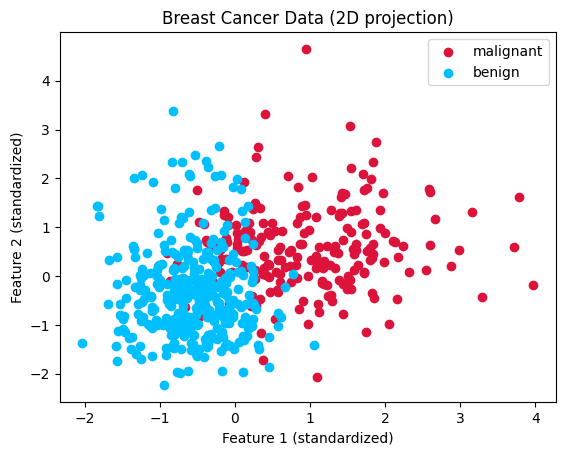

In [55]:
dataset=load_breast_cancer()

x=dataset.data

y=dataset.target

x=preprocessing.StandardScaler().fit_transform(x) #Estandarizamos los datos de y siendo mas faciles de trabajar usando un escalador

cancertypes=dataset.target_names

colors=['crimson','deepskyblue']

for i in range(cancertypes.size):
    plt.scatter(x[y==i,0],x[y==i,1],c=colors[i],label=cancertypes[i])

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.title('Breast Cancer Data (2D projection)')
plt.show()   

A simple vista se evidencia que los datos no pueden ser linealmente separables , pero con este metodo podremos lograrlo

C:\Users\Cristian\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


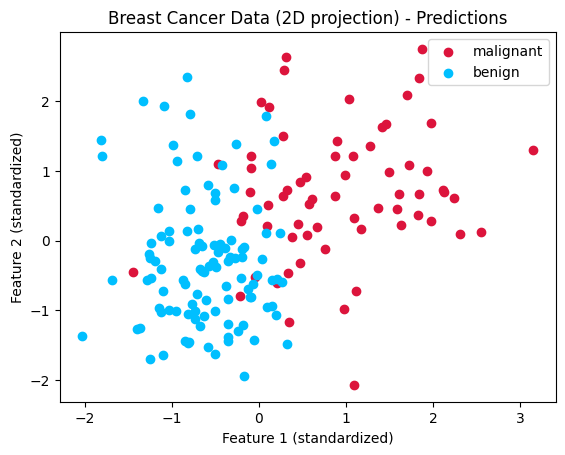

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=42)

model_svm=svm.LinearSVC()

model_svm=model_svm.fit(x_train,y_train)

predictions=model_svm.predict(x_test)

matrix_c=confusion_matrix(y_test,predictions)

for j in range(cancertypes.size):
    #Grafico de dispersion con los datos linealmente separables y clasificados
    plt.scatter(x_test[predictions==j,0],x_test[predictions==j,1],c=colors[j],label=cancertypes[j])
    
plt.title('Breast Cancer Data (2D projection) - Predictions')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.show()    
    

#Funcion para predecir manualmente

def manual_predict(feature1,feature2):
    prediction=model_svm.predict([[feature1,feature2]])
    return('La prediccion es: ',cancertypes[prediction[0]])


